In [46]:
import numpy as np
import matplotlib.pyplot as pt

import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [47]:
md = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(input_shape = (100, 100, 3), activation = 'relu', kernel_size = (5, 5), filters = 32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')    
])

In [48]:
md.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 64)         

In [49]:
ip = md.inputs                           # input 레이어
op = md.layers[0].output                 # output 레이어
fm = Model(inputs = ip, outputs = op)    # 위의 둘을 입력과 출력으로 사용하는 모델 특성 맵 정의
fm.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20_input (InputLayer) [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


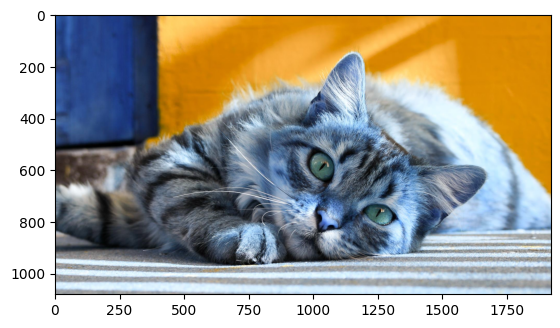

In [50]:
img = cv2.imread("./source/chap5/data/cat.jpg")
pt.imshow(img)

In [51]:
img = cv2.resize(img, (100, 100))         # 이미지 크기조정
ip_img = np.expand_dims(img, axis = 0)    # 이미지의 차원 조정
print(ip_img.shape)                       # 입력 이미지 형태 출력

ft = fm.predict(ip_img)                   # 이미지를 특성 맵 모델에 적용
print(ft.shape)                           # 특성 맵 형태 출력

(1, 100, 100, 3)
(1, 96, 96, 32)


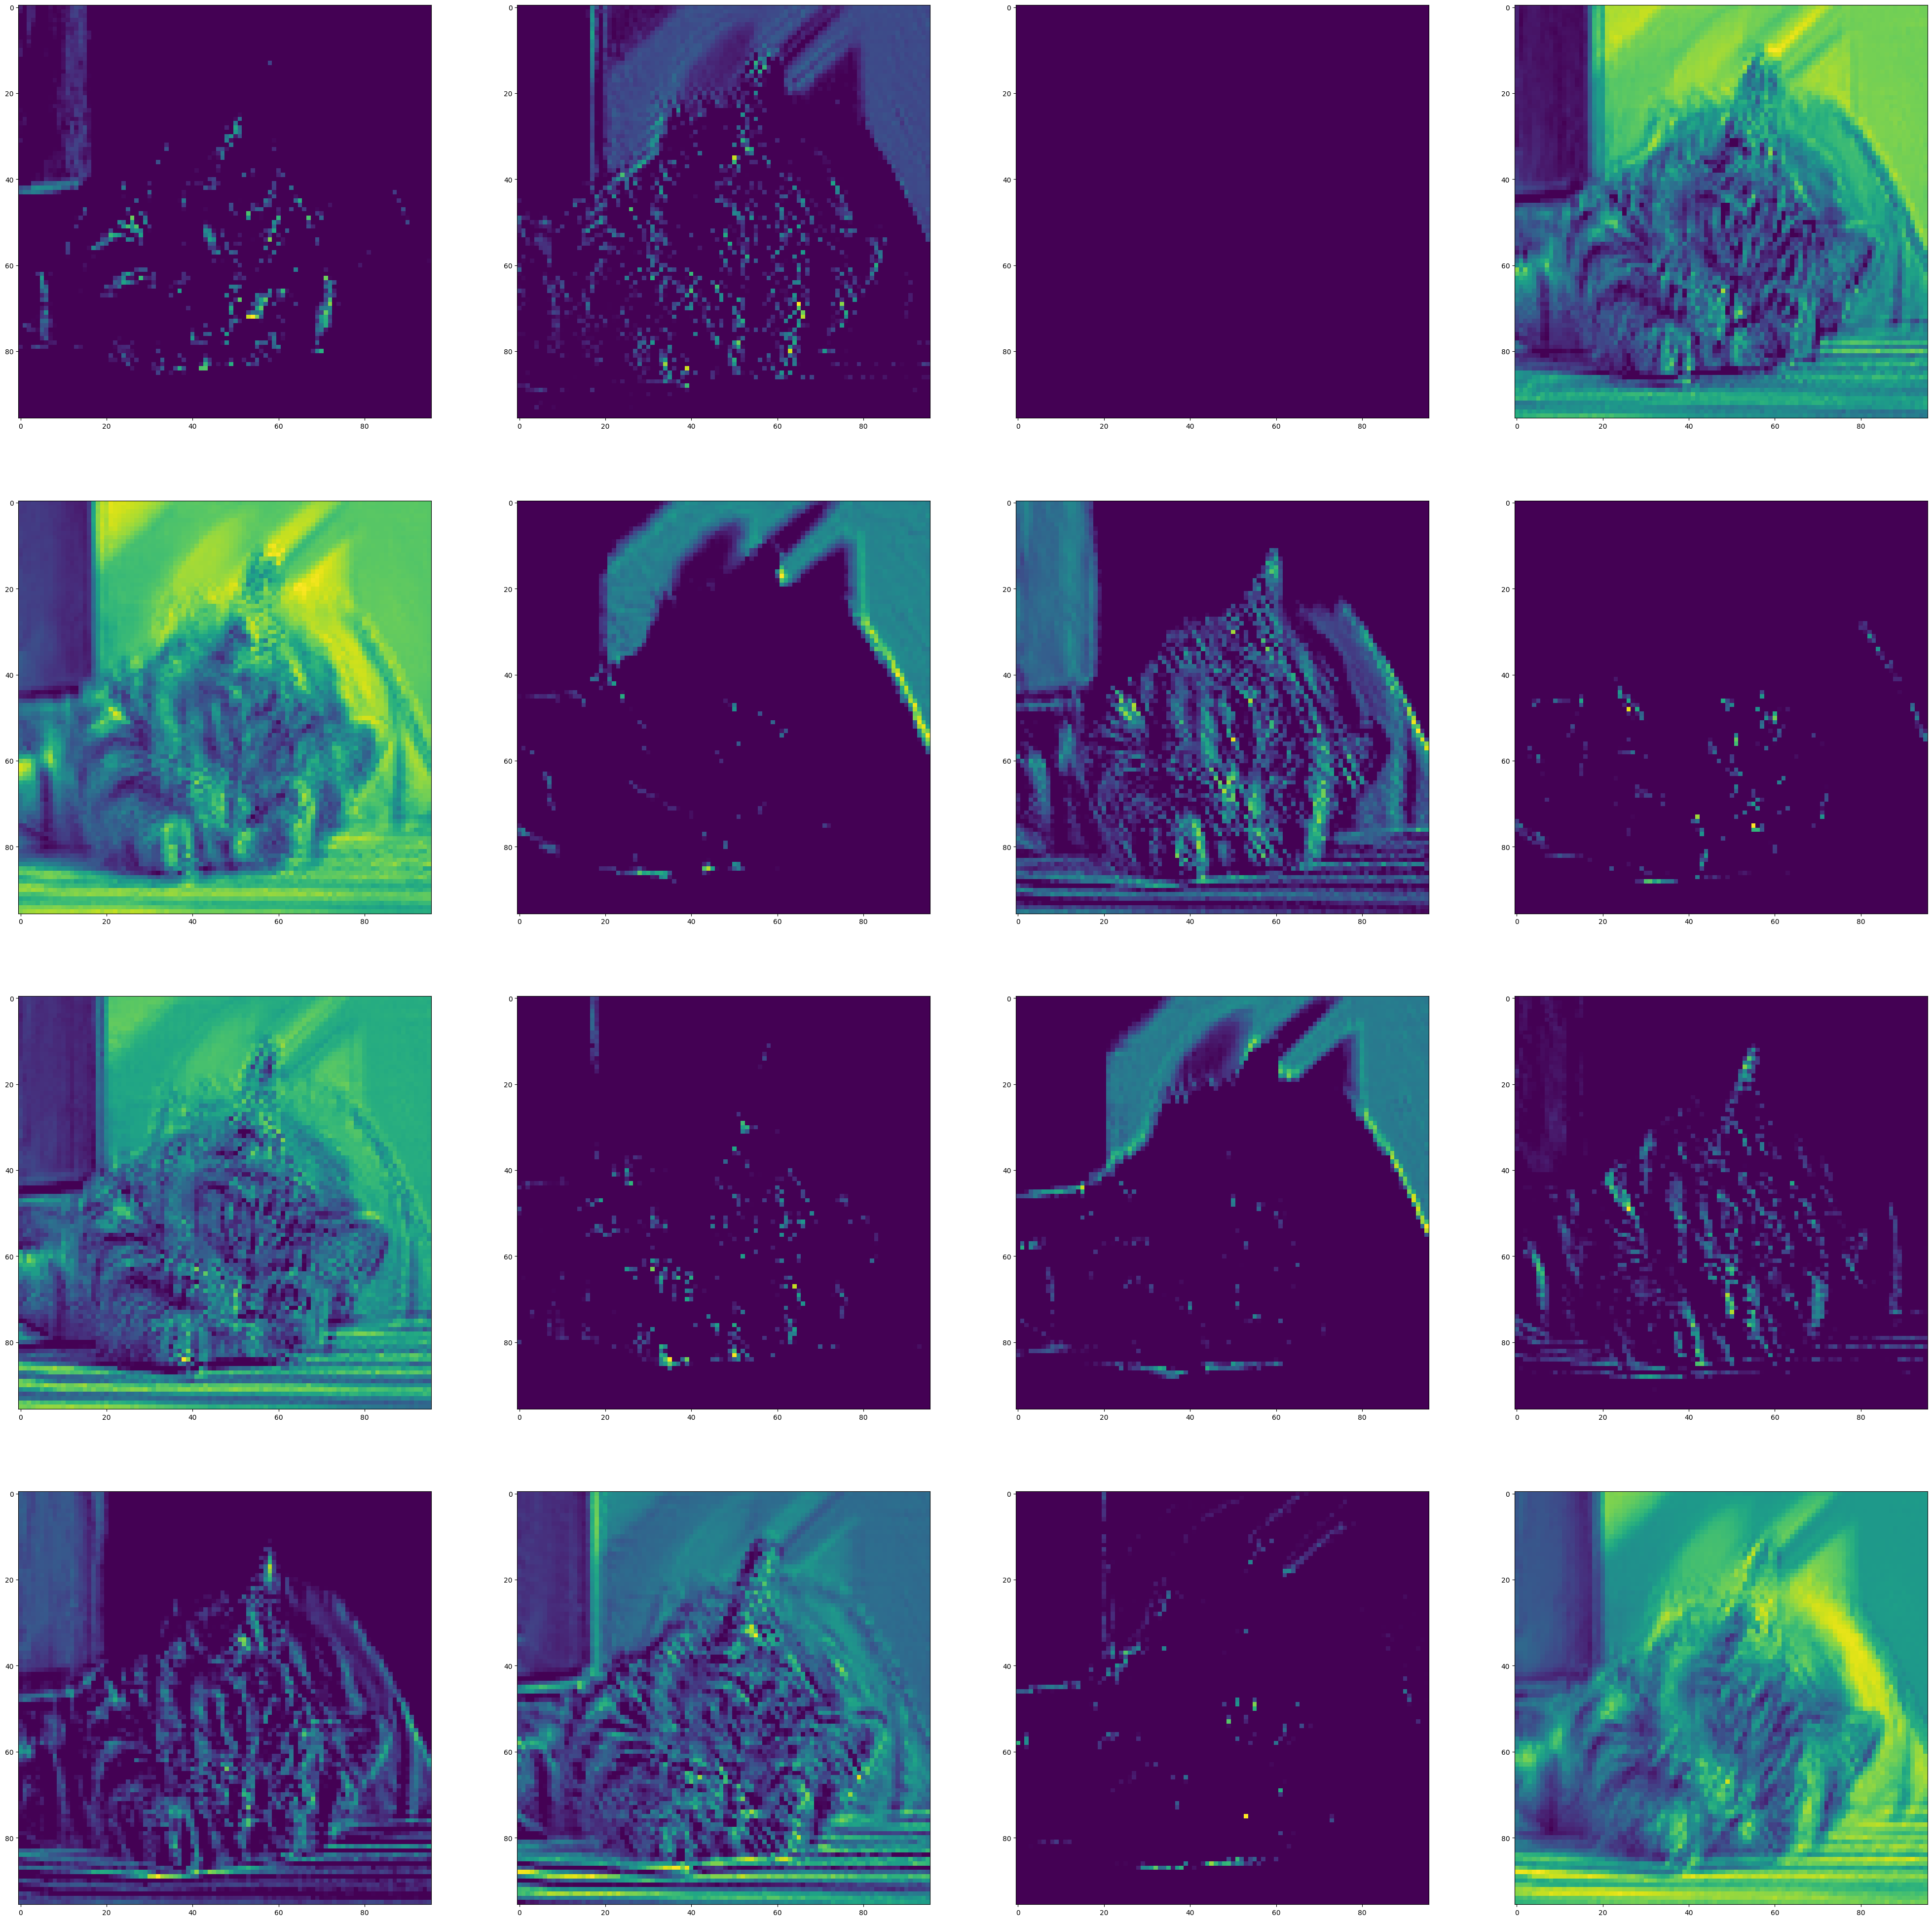

In [52]:
fig = pt.figure(figsize = (50, 50))

for i in range(16):
    
    x = fig.add_subplot(4, 4, i+1)
    x.imshow(ft[0, : , : ,i])

In [53]:
ip = md.inputs                           # input 레이어
op = md.layers[2].output                 # output 레이어
fm = Model(inputs = ip, outputs = op)    # 위의 둘을 입력과 출력으로 사용하는 모델 특성 맵 정의
fm.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20_input (InputLayer) [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 44, 64)        51264     
Total params: 53,696
Trainable params: 53,696
Non-trainable params: 0
_________________________________________________________________


(1, 44, 44, 64)


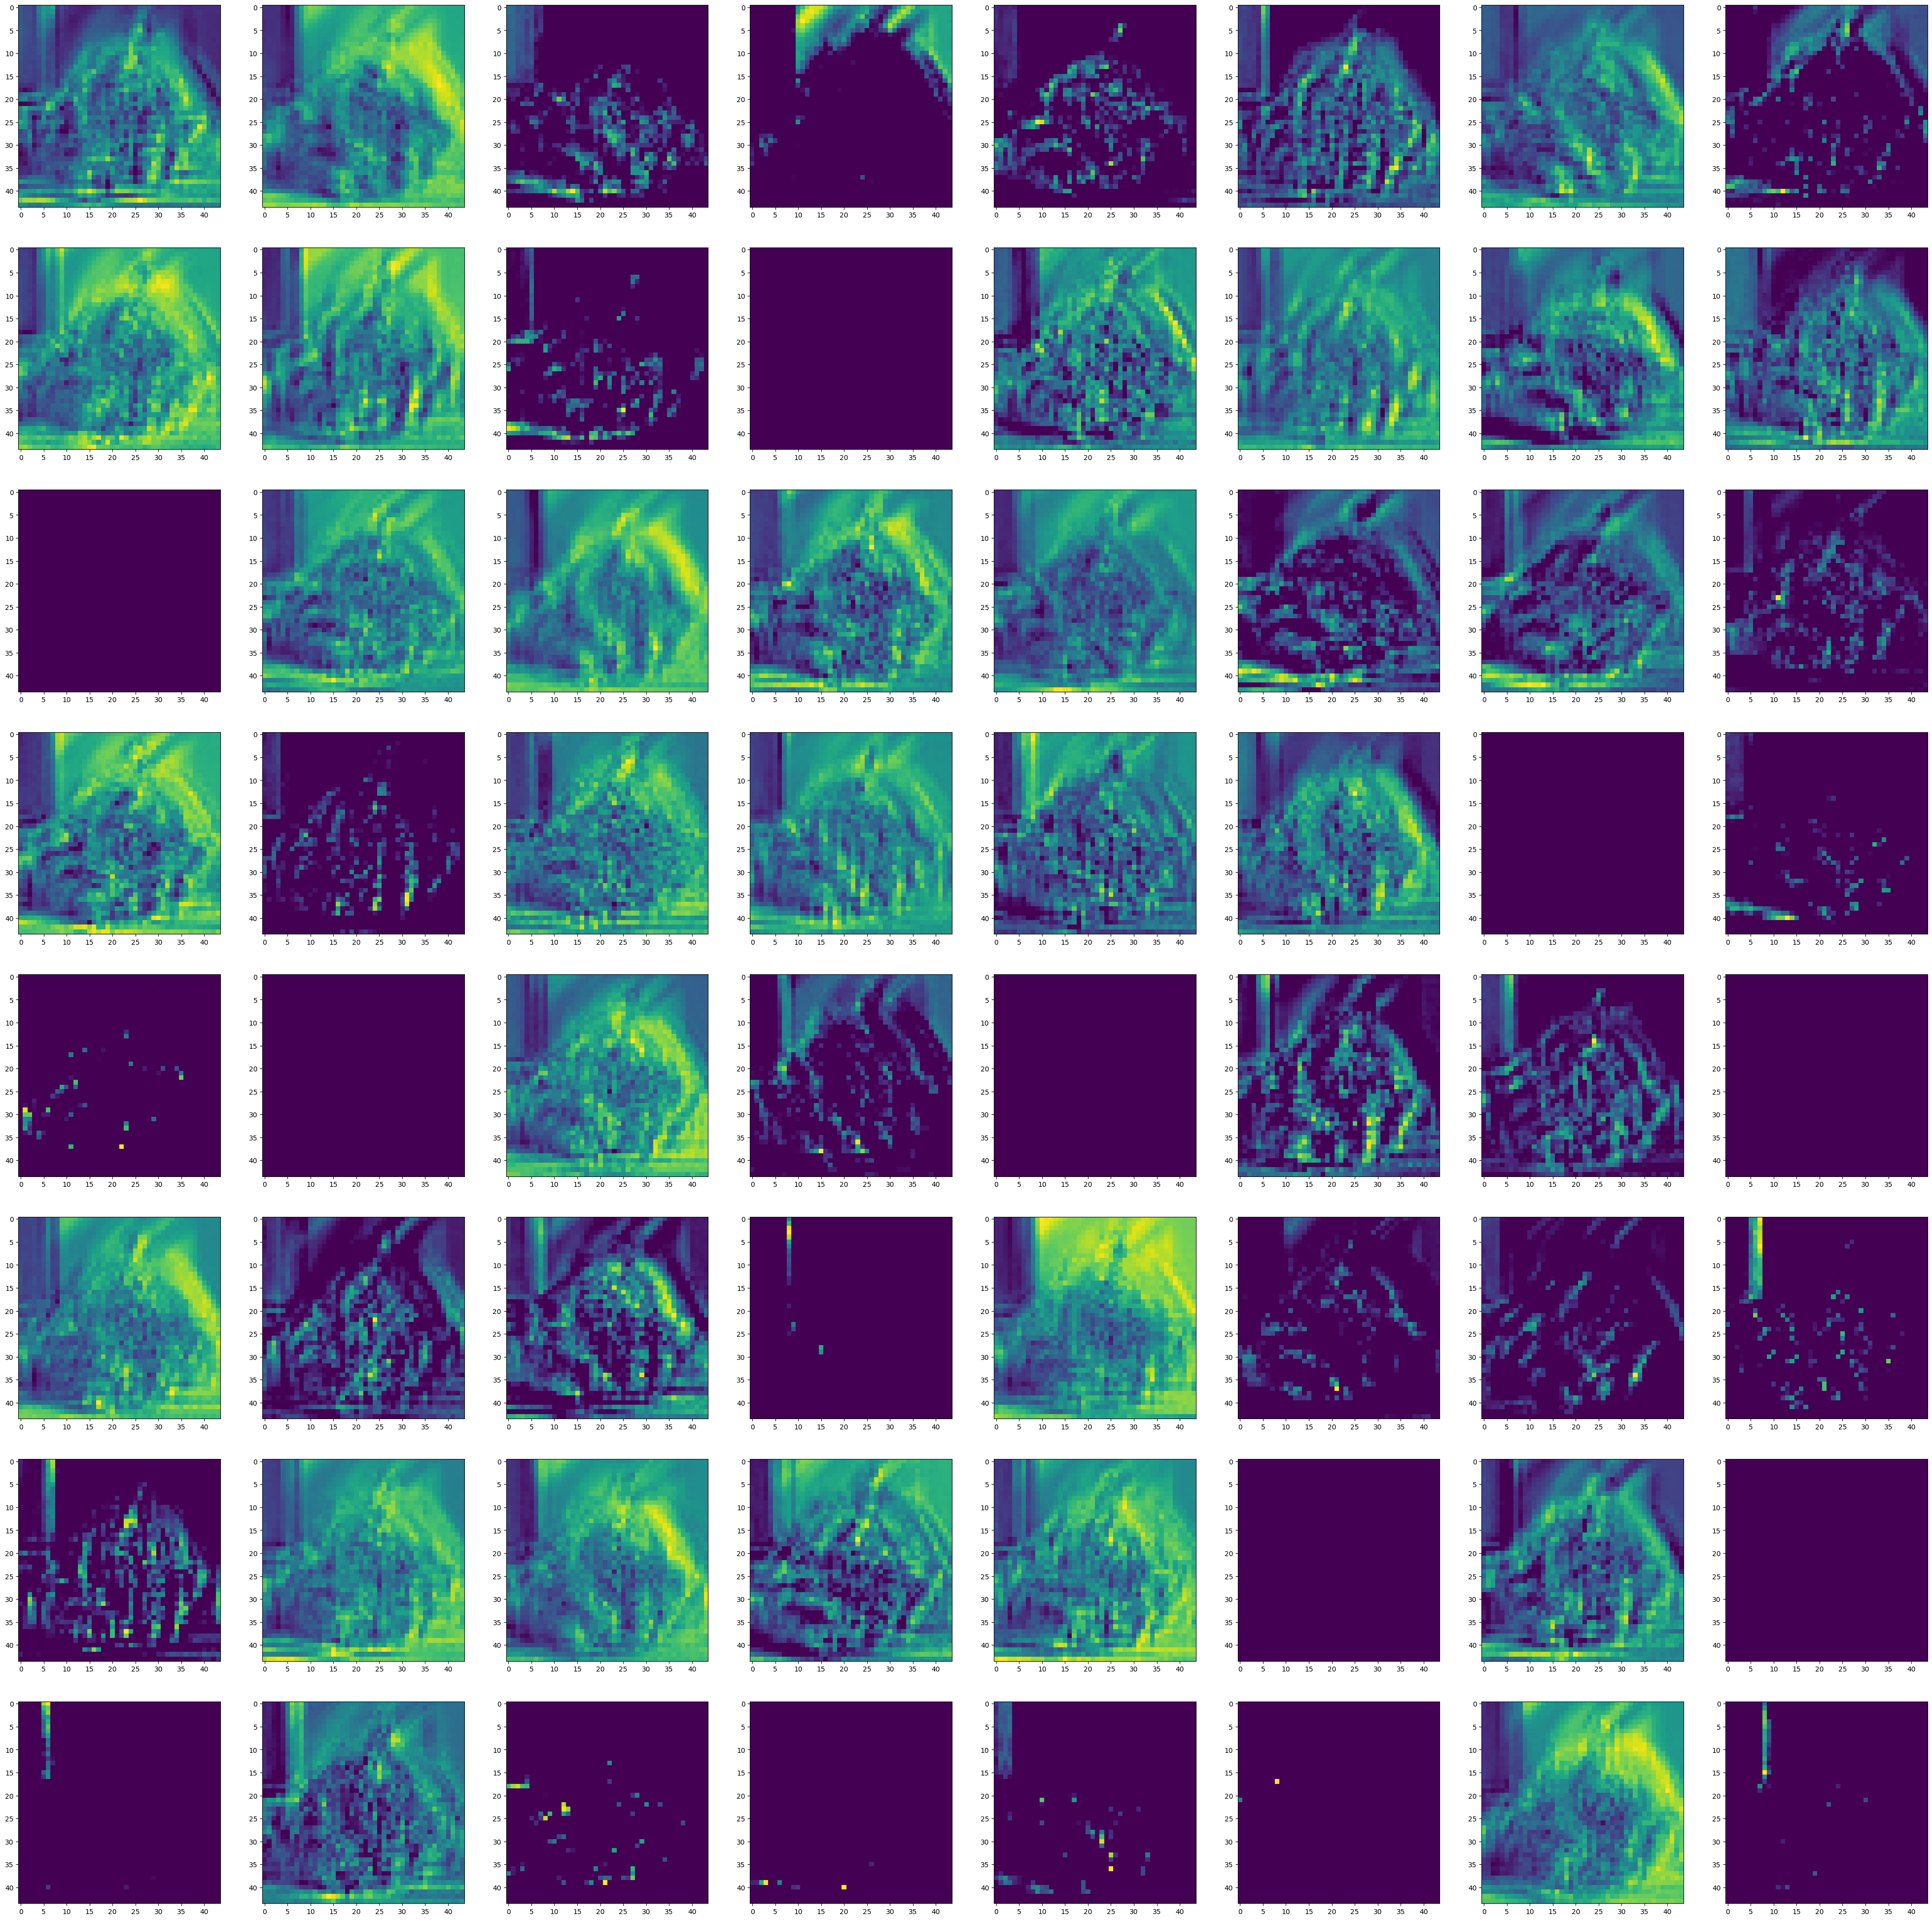

In [54]:
ft = fm.predict(ip_img)                   # 이미지를 특성 맵 모델에 적용
print(ft.shape)                           # 특성 맵 형태 출력

fig = pt.figure(figsize = (50, 50))

for i in range(64):
    
    x = fig.add_subplot(8, 8, i+1)
    x.imshow(ft[0, : , : ,i])

In [55]:
ip = md.inputs                           # input 레이어
op = md.layers[6].output                 # output 레이어
fm = Model(inputs = ip, outputs = op)    # 위의 둘을 입력과 출력으로 사용하는 모델 특성 맵 정의
fm.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20_input (InputLayer) [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 64)        

(1, 5, 5, 64)


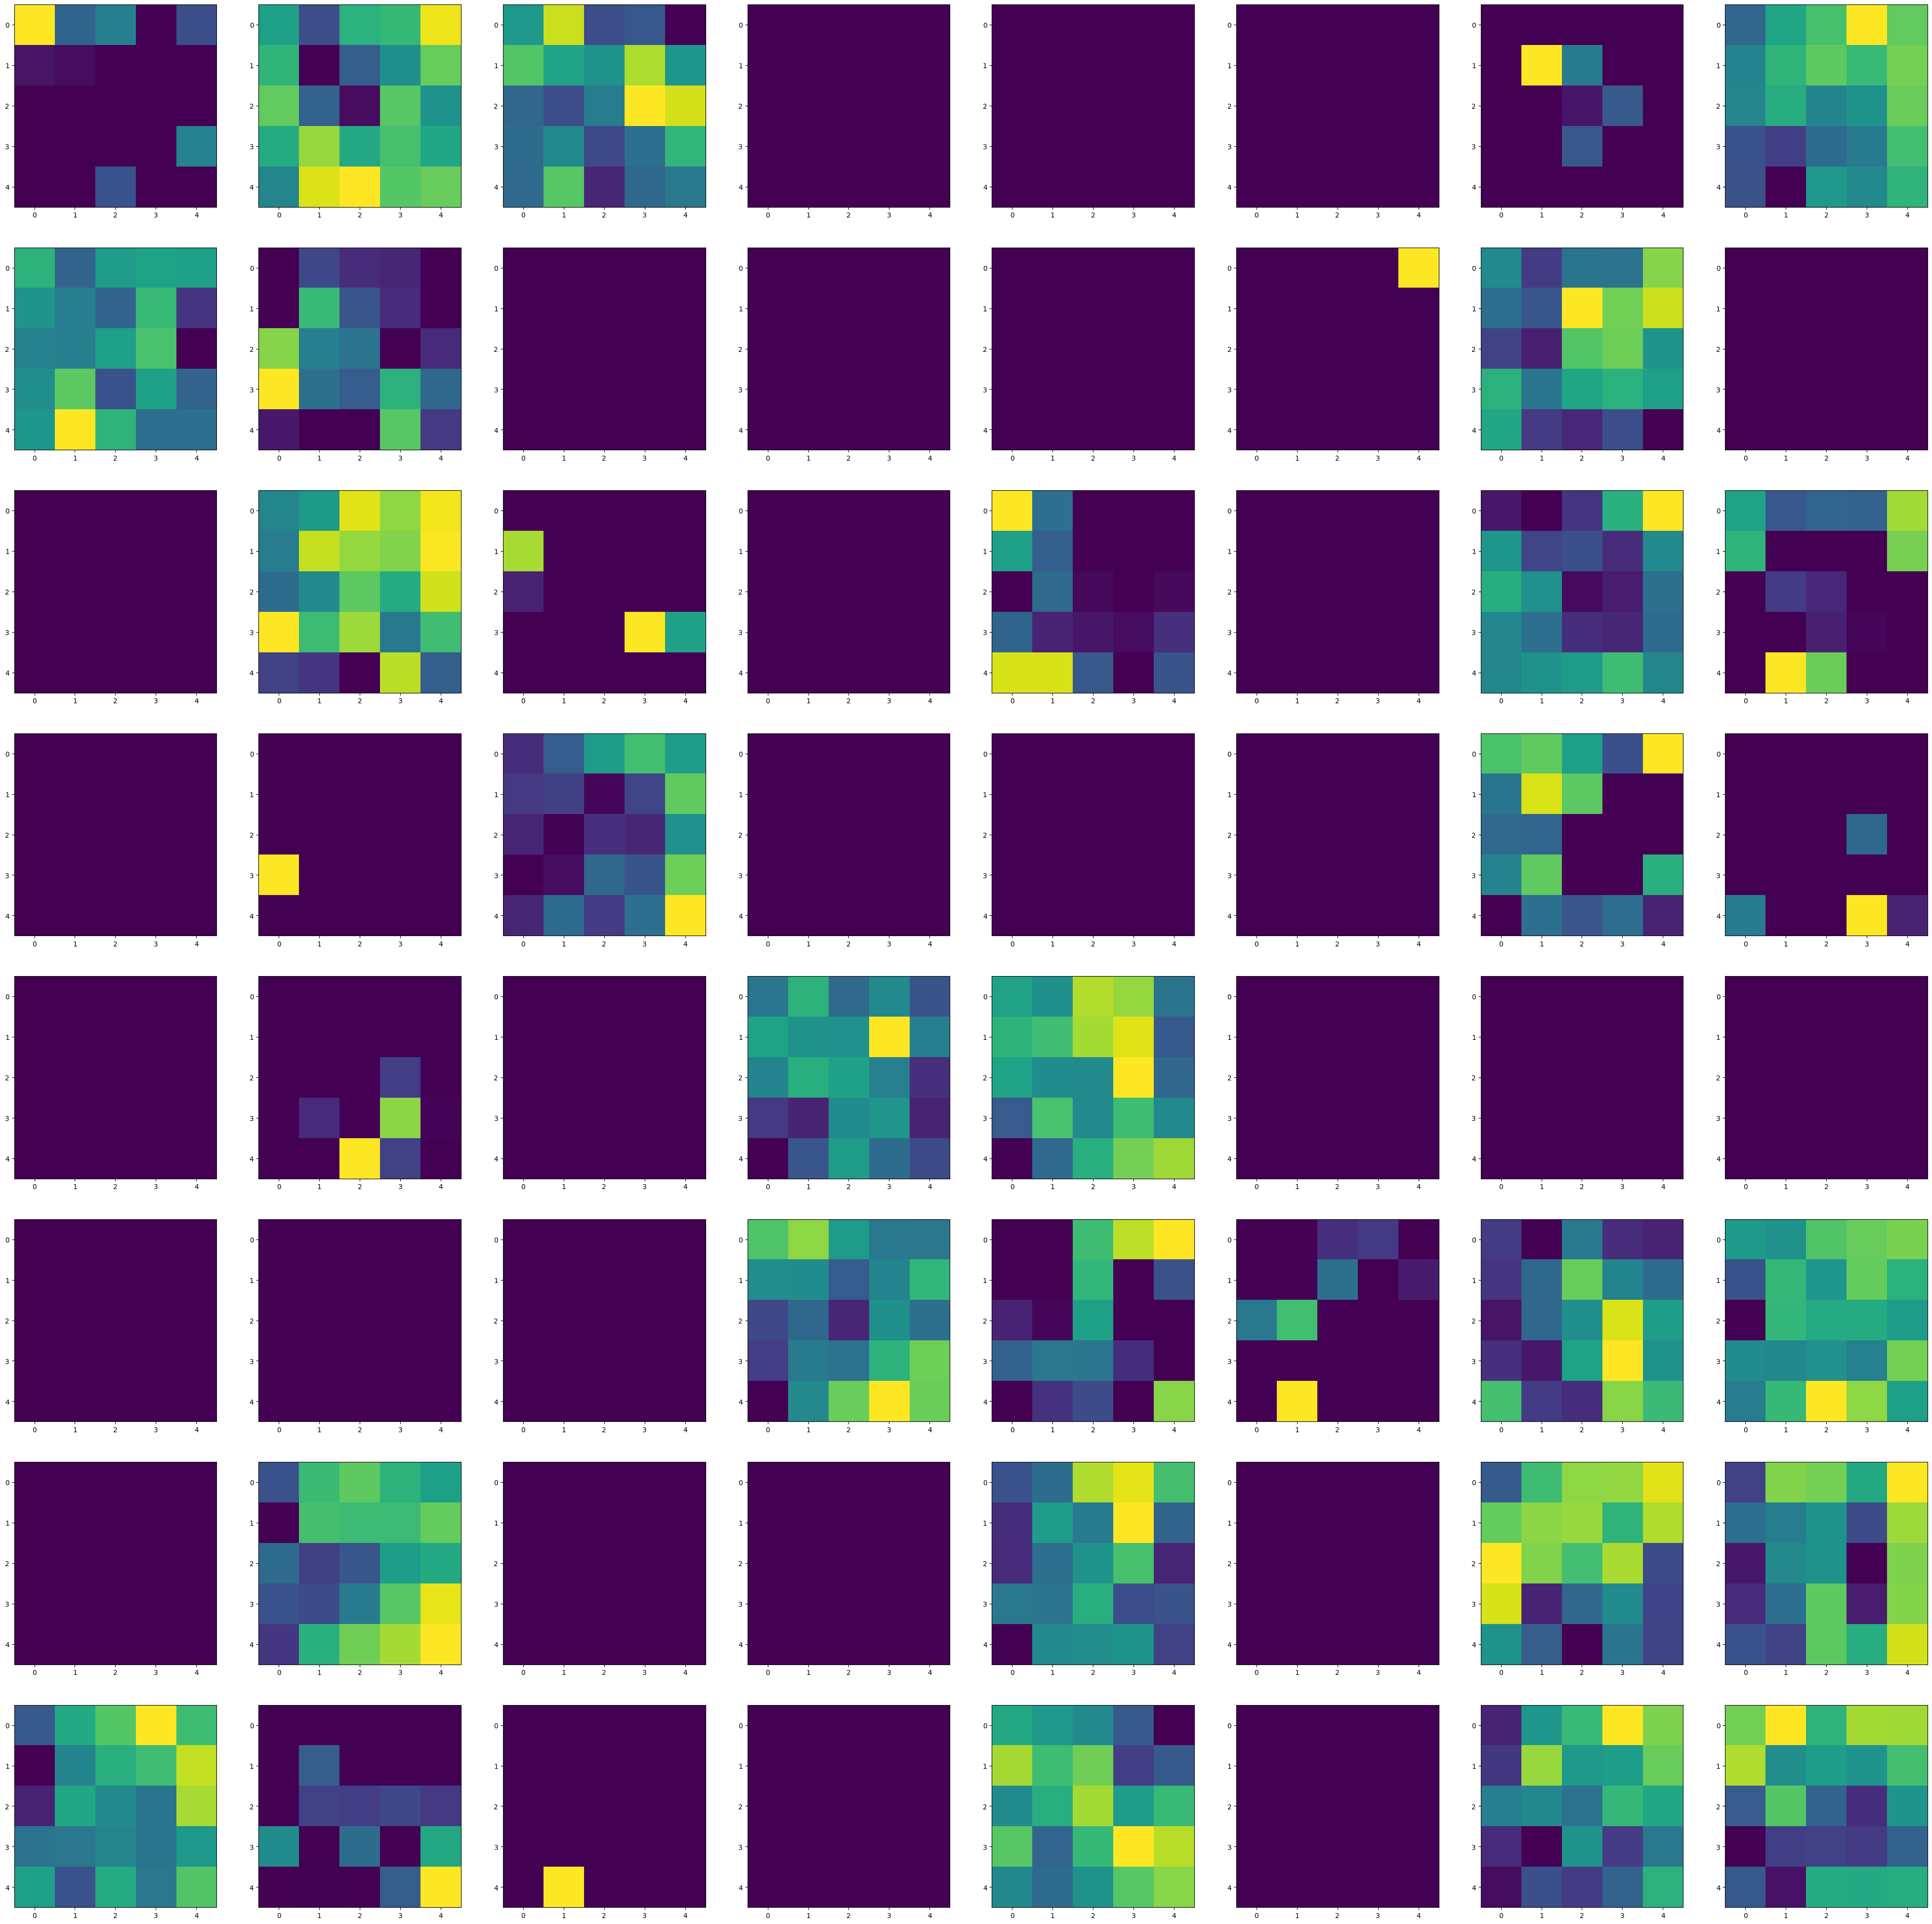

In [56]:
ft = fm.predict(ip_img)                   # 이미지를 특성 맵 모델에 적용
print(ft.shape)                           # 특성 맵 형태 출력

fig = pt.figure(figsize = (50, 50))

for i in range(64):
    
    x = fig.add_subplot(8, 8, i+1)
    x.imshow(ft[0, : , : ,i])